## **Problema: Prever a evasão de Cliente - Churn**

Recebemos uma demanda da Empresa telecomX_BR para criar um modelo preditivo para resolver uma dor que eles possuim em seu departamento de contratos e serviços.

 **Nesse modelo nós não vamos abordar sobre impacto financeiro apesar de ser um modelo preditivo o objetivo seja esse de prever custos, mas esse tema estara na terceira parte do projeto.**

**Respostas que vamos responder:**

> - Quem são os clientes com maior risco de evasão?
> - Quais variáveis mais Influenciam esse comportamento?
> - Que tipo de perfil a empresa precisa manter mais próximo?


# **Missão do Cientista de dados**

#### 🎯 Missão
1. Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.  

2. A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.  
-

#### 🧠 Objetivos do Desafio

* Preparar os dados para a modelagem (tratamento, encoding, normalização).

* Realizar análise de correlação e seleção de variáveis.

* Treinar dois ou mais modelos de classificação.

* Avaliar o desempenho dos modelos com métricas.

* Interpretar os resultados, incluindo a importância das variáveis.

* Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

# Carregando os dados e bibliotecas

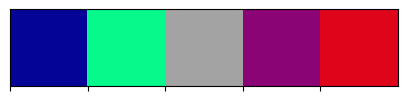

In [1]:
'''
Importando bibliotecas
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
Warning
'''
import warnings
warnings.filterwarnings('ignore')

'''
Configuração Paleta de cores
'''
paleta = ['#040497','#05FA8B','#A3A3A3',  '#8A0476', '#DE041A']
sns.set_palette(sns.color_palette(paleta))
sns.palplot(sns.color_palette(paleta))
plt.savefig('paleta.png')

In [2]:
# Colocando para aparecer todas as colunas sem limitação.
pd.set_option('display.max_columns', None)

In [3]:
csv= 'https://raw.githubusercontent.com/Siiqueira/TelecomX_BR/refs/heads/main/data_base/TelecomX_tratado.csv'
df = pd.read_csv(csv)
df.head()

,Unnamed: 0,ConsumidorID,Cancelamento,Genero,Idoso,Parceiro,Dependentes,Permanencia,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Tv_a_Cabo,Assinatura_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Contas_Mensal,Contas_Total,Contas_Diarias
0,0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Anual,1,Cheque Correio,65.6,593.30,2.186667
1,1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mensal,0,Cheque Correio,59.9,542.40,1.996667
2,2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Optica,0,0,1,0,0,0,Mensal,1,Cheque Digital,73.9,280.85,2.463333
3,3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Optica,0,1,1,0,1,1,Mensal,1,Cheque Digital,98.0,1237.85,3.266667
4,4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra Optica,0,0,0,1,1,0,Mensal,1,Cheque Correio,83.9,267.40,2.796667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7032 non-null   int64  
 1   ConsumidorID          7032 non-null   object 
 2   Cancelamento          7032 non-null   int64  
 3   Genero                7032 non-null   object 
 4   Idoso                 7032 non-null   int64  
 5   Parceiro              7032 non-null   int64  
 6   Dependentes           7032 non-null   int64  
 7   Permanencia           7032 non-null   int64  
 8   Servico_Telefonico    7032 non-null   int64  
 9   Multiplas_Linhas      7032 non-null   int64  
 10  Servico_Internet      7032 non-null   object 
 11  Seguranca_Online      7032 non-null   int64  
 12  Backup_Online         7032 non-null   int64  
 13  Protecao_Dispositivo  7032 non-null   int64  
 14  Suporte_Tecnico       7032 non-null   int64  
 15  Tv_a_Cabo            

---

# Removendo colunas e tratando os dados

In [5]:
# Removendo a coluna Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)

In [6]:
# Renomeando colunas
colunas = ['consumidorID','cancelamento', 'genero', 'idoso', 'parceiro', 'dependentes',
       'permanencia', 'servico_telefonico', 'multiplas_linhas',
       'servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'tv_a_cabo',
       'assinatura_flmes', 'tempo_contrato', 'fatura_online', 'metodo_pagamento',
       'gastos_mensais', 'total_gastos', 'gastos_diarios']
df.columns = colunas

In [7]:
# Salvando dados para validação (Usar depois que o modelo estiver treinado)
df_val = df.loc[:20]

In [8]:
# Removendo a coluna ConsumidorID
df = df.drop('consumidorID', axis=1)
df.head(3)

,cancelamento,genero,idoso,parceiro,dependentes,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_a_cabo,assinatura_flmes,tempo_contrato,fatura_online,metodo_pagamento,gastos_mensais,total_gastos,gastos_diarios
0,0,Feminino,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Anual,1,Cheque Correio,65.6,593.30,2.186667
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mensal,0,Cheque Correio,59.9,542.40,1.996667
2,1,Masculino,0,0,0,4,1,0,Fibra Optica,0,0,1,0,0,0,Mensal,1,Cheque Digital,73.9,280.85,2.463333


# **Codificando (Encoder) colunas categóricas**

In [9]:
# Importando biblioteca para converter colunas categóricas em numericas
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [10]:
# Separando os dados de features e target
X = df.drop('cancelamento', axis=1)
y = df['cancelamento']

y.to_csv('y_tratados.csv', index=False)

In [11]:
# Salvando nomes das colunas para usar depos do Encoder
nomes_colunas = X.columns

**One Hot Encoder**

In [12]:
# Criando parametros para converter colunas object categorica em numericas
one_hot_encoder = make_column_transformer((
    OneHotEncoder(drop= 'if_binary'),
    ['genero','servico_internet','tempo_contrato','metodo_pagamento']),
    remainder='passthrough',
    sparse_threshold=0)

In [13]:
# Trnsformando os dados
X = one_hot_encoder.fit_transform(X)

In [14]:
# Depois da transformação o One_hot develve uma Series e precisamos transformar em um DataFrame
X = pd.DataFrame(X, columns= one_hot_encoder.get_feature_names_out(nomes_colunas))

# renomeando as colunas
X.columns = X.columns.str.replace('remainder__', '')
X.columns = X.columns.str.replace('onehotencoder__', '')

X.to_csv('X_tratados_pos_OneHotEnc.csv', index=False)
X.head(1)

,genero_Masculino,servico_internet_DSL,servico_internet_Fibra Optica,servico_internet_Nenhum servico,tempo_contrato_Anual,tempo_contrato_Bi-Anual,tempo_contrato_Mensal,metodo_pagamento_Cartão Credito,metodo_pagamento_Cheque Correio,metodo_pagamento_Cheque Digital,metodo_pagamento_Transferencia bancaria,idoso,parceiro,dependentes,permanencia,servico_telefonico,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_a_cabo,assinatura_flmes,fatura_online,gastos_mensais,total_gastos,gastos_diarios
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.3,2.186667


## Salvando dados de validação do modelo

In [15]:
# Salvando dados de validação para testar o modelo
X_val = X.loc[:20] # Salvando X de validação
y_val = y.loc[:20] # Salvando y de validação

# Retirando dos dados que seram treinados
X = X.iloc[21:] # Retirando dados de validação de X
y = y.iloc[21:] # Retirando dados de validação de y

## Proporção dos dados de Cancelamento (target)

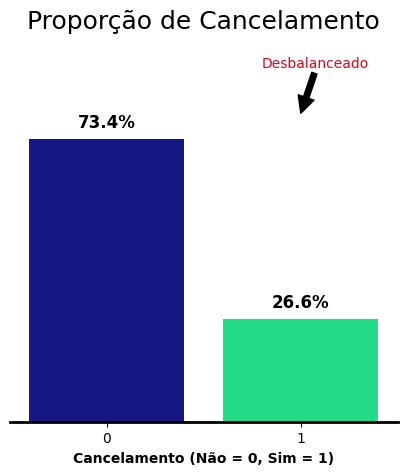

In [16]:
# Verificando o balanceamento dos dados (alvo)
proporcao_cancelamento = y.value_counts(normalize=True).reset_index()

# Configurando a figura
fig, ax = plt.subplots(figsize=(5, 5))
cor_text= paleta[4]
cor_barras= [paleta[0],paleta[1]]

# Criando Plot
sns.barplot(proporcao_cancelamento, x='cancelamento', y='proportion', palette=cor_barras)
plt.title('Proporção de Cancelamento',fontsize=18)
plt.xlabel('Cancelamento (Não = 0, Sim = 1)', fontweight='bold')
plt.ylabel('')
plt.ylim(0,1)
ax.set_yticks([])
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)

# Loop para colocar escrever texto em cima de cada coluna
for i, v in enumerate(proporcao_cancelamento['proportion']):
    ax.text(i, v + 0.02, f"{v*100:.1f}%", ha="center", va="bottom", size=12, fontweight='bold')

# Criando uma anotação no grafico
ax.annotate('Desbalanceado', xy=(1, 0.80), xytext=(0.8, 0.95), va='top', ha='left', color=cor_text,
            arrowprops=dict(facecolor='black', shrink=0.01))
plt.savefig('proporcao_cancelamento.png')
plt.show()

Como podemos ver proporção de 73% não cancelaram e 24% cancelaram, mostra que os dados estão sim desbalanceados e precisamos balancear para que o modelo não gerar viés. Será aplicado algumas tecnicas no modelo para melhorar o balanceamento dos dados, se não funcionar iremos experimentar o oversampling e o undersampling. Como vamos usar um modelo robusto não vamos precisar normalizar os dados.

---

## Correlação entre as variavéis

In [17]:
# Correlação das variaveis explicativas com a variavel alvo
# Optei pela saida em formato de lista para ficar visivel mente mais agradavel
X_corr = X.corrwith(y).sort_values(ascending=False) # Use X.corrwith(y).sort_values(ascending=False)[0] para retornar em formato de matriz
print(X_corr)

tempo_contrato_Mensal                      0.404515
servico_internet_Fibra Optica              0.307972
metodo_pagamento_Cheque Digital            0.301413
gastos_mensais                             0.193535
gastos_diarios                             0.193535
fatura_online                              0.191747
idoso                                      0.149498
tv_a_cabo                                  0.063734
assinatura_flmes                           0.061150
multiplas_linhas                           0.041377
servico_telefonico                         0.011733
genero_Masculino                          -0.010141
protecao_dispositivo                      -0.066771
backup_online                             -0.081923
metodo_pagamento_Cheque Correio           -0.090889
metodo_pagamento_Transferencia bancaria   -0.117911
servico_internet_DSL                      -0.124224
metodo_pagamento_Cartão Credito           -0.134756
parceiro                                  -0.150002
dependentes 

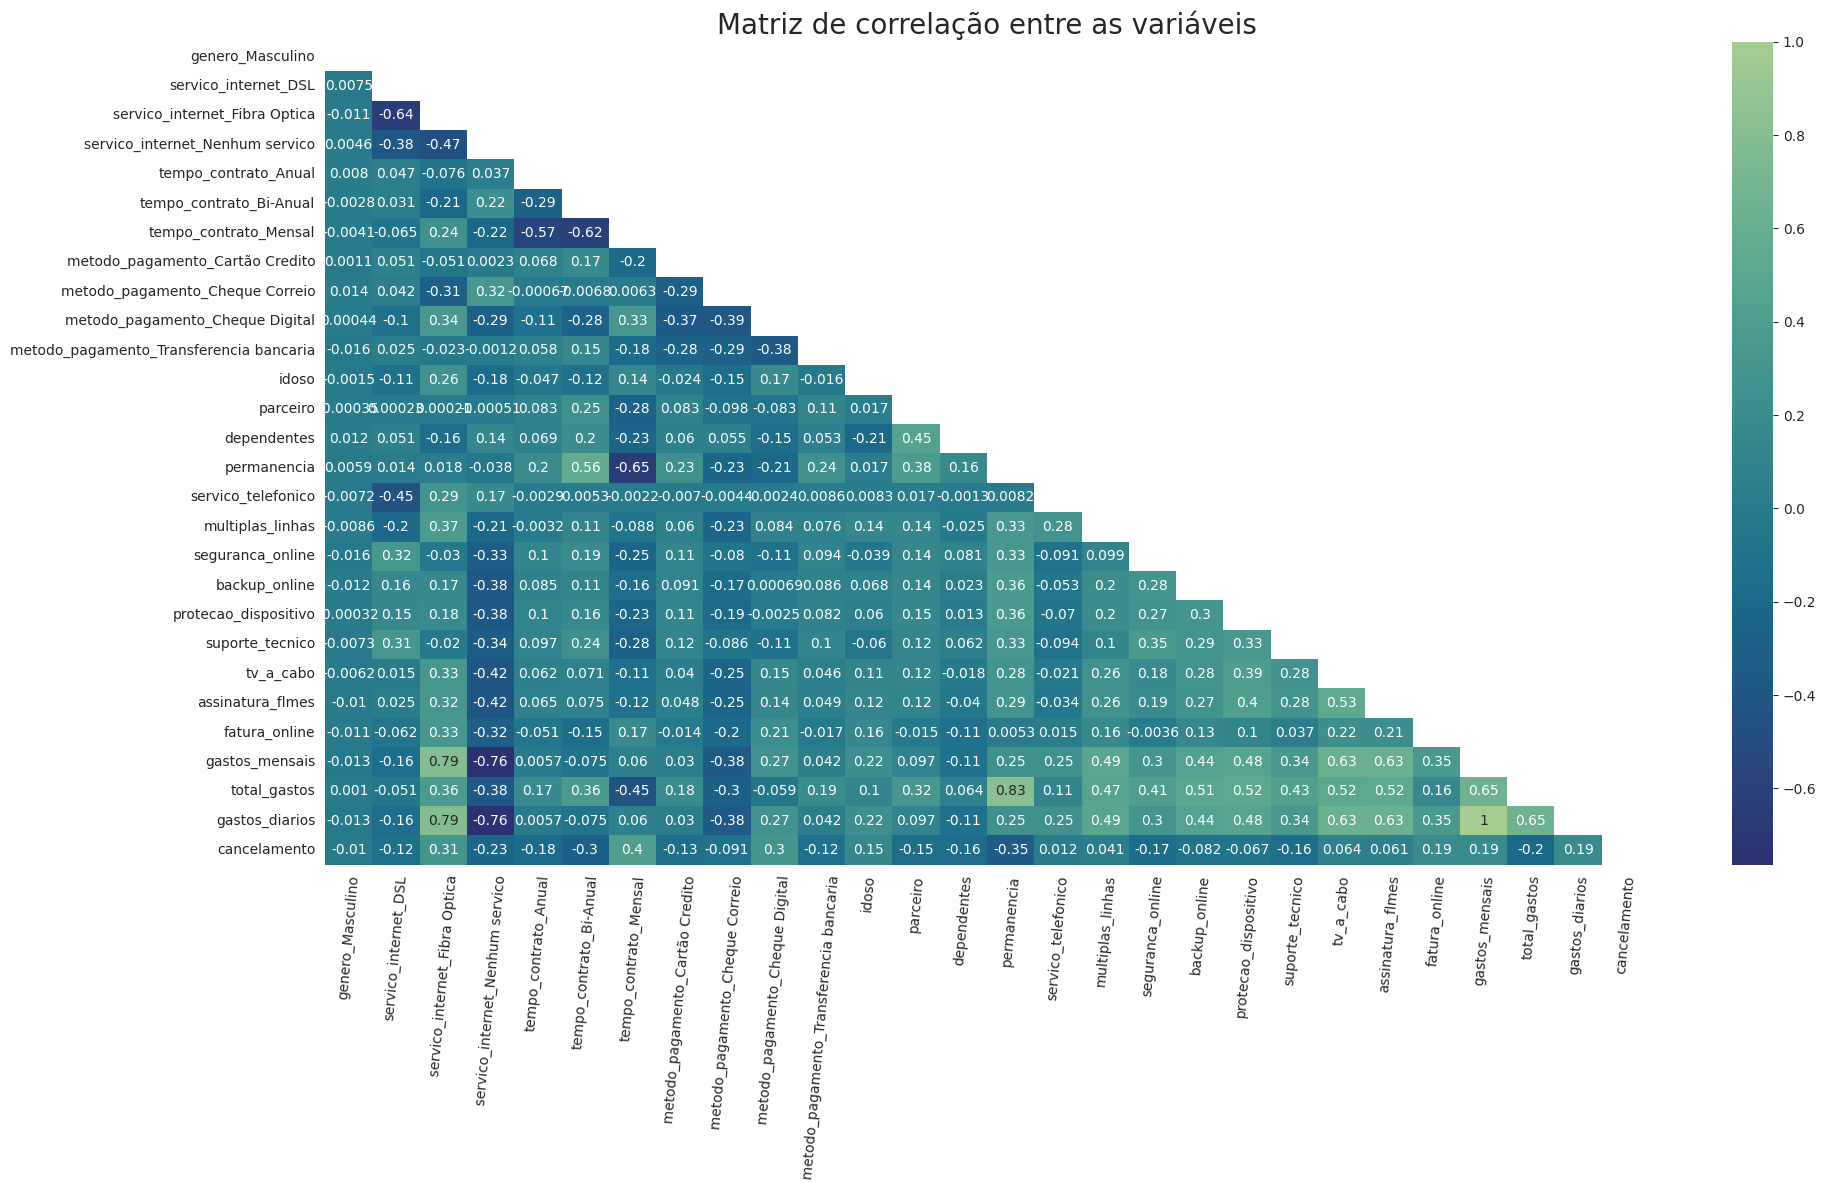

In [18]:
# Concatenando os dados de X e y para criar uma matriz
df_corr = pd.concat([X,y],axis = 1)

# Configurando a figura do plot
sns.set_style('white')
plt.figure(figsize=(20, 12))

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(df_corr.corr(), dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Gerando o gráfico
sns.heatmap(df_corr.corr(), mask=mascara, cmap='crest_r', annot=True)
plt.title('Matriz de correlação entre as variáveis', fontsize=20)
plt.xticks(rotation=85)
plt.tight_layout()
plt.savefig('matriz_correlacao.png')
plt.show()

- Buscando entender a correlação entre as colunas podemos notar alguns dados que chama atenção:

  - As Variáveis gastos mensais e gastos diarios tem correção perfeita. Qualquer correlação dessas colunas com as outras irão ser identicas, o melhor para os dados será excluir uma delas.
  - Correlação entre (gastos_mensais e gastos diarios) com o serviço de fibra optica está próximo dos 80%, uma correção muito forte, o que indica que o serviço de fibra optica aumenta com uma certa significância os gastos dos clientes quando optam por contratar esse serviço.
  - Os clientes que tem contratado o serviços de fibra optica tem uma correlação média de 31% com o **cancelamento**, nos deixa alerta, pois 31% mesmo sendo uma correção média, para casos de churns é um valor significativo e precisa ser estudado.
  - junto com a variavel de serviços de fibra optica, chama a atenção que os os clientes que tem contratos mensais, representa uma correção de 40% com a variavel **cancelamento**, mostrando que clientes ainda não fidelizados tem cancelado mais seus contratos. Podemos reforçar essa afirmativa quando analisamos a variável permanencia que tem uma correlação de -35% o contrario que podemos ver com a variável contratos mensais. Onde a correlação indica que quanto mais tempo o seu contrato e sua permanência maior é a correlação negativa com a variáriavel **cancelamento**.

**Tempo de Contrato X Cancelamento**

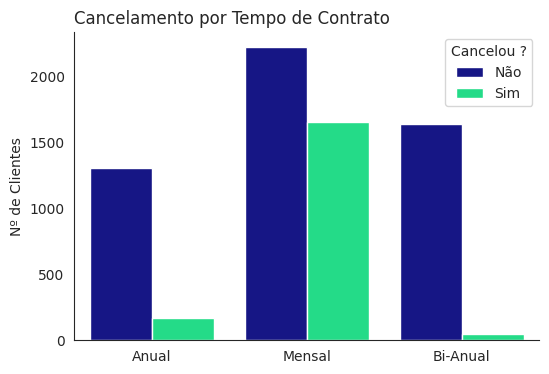

In [19]:
#Visualizando a relação entre o tempo de contrato com o cancelamento

# Criando a figura
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 4))


# Criando a figura
ax = sns.countplot(data=df, x='tempo_contrato', hue='cancelamento', palette=paleta)
plt.title('Cancelamento por Tempo de Contrato', loc='left')
plt.xlabel('')
plt.ylabel('Nº de Clientes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Cancelou ?', labels=['Não', 'Sim'])

plt.savefig('cancelamento_tempo_contrato.png')
plt.show()

**Total de Gasto x Cancelamento**

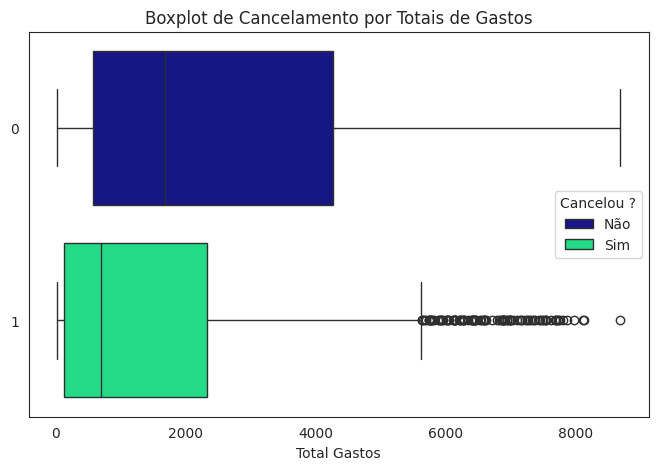

In [20]:
# Gráfico para ver a distribuição do Total de gastos por Cancelamento

# Criando figura e gráfico
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='cancelamento', x='total_gastos', orient='h', palette=paleta)

# Editando
plt.title('Boxplot de Cancelamento por Totais de Gastos')
plt.ylabel('')
plt.xlabel('Total Gastos')
plt.legend(title='Cancelou ?', labels=['Não', 'Sim'], loc= 'right')
plt.savefig('cancelamento_total_gastos.png')
plt.show()

1. No gráfico de cancelamento por tempo de contrato, temos uma tendêcia muito clara, que os clientes que possuem contratos mensais cancelam mais suas contas. Com essa informação já poderiamos enviar para o marketing trabalhar em alguma campanha para esses clientes com contratos mensais.

2. No grafico de cancelamento por total de gastos, para os clientes que não cancelaram tem uma distribuição de dados passando dos 8.000 a mediana proximo aos 2000, e o quartil 75% passando dos 4.000.
Para os clientes que cancelaram, esses dados estão bem a baixo, a mediana esta proximo dos 700 e o quartil 75% próximo de 2.000 e mostrando que a maioria dos dados não passam de 6.000.

 Esse boxplot, confirma a tendência de que como os clientes com contratos mais curtos acumulam menos gastos com a empresa e por esse motivo podemos considerar os clientes que nesse box que os clientes cancelaram os dados que seria outliers na verdade poderiam ser clientes fieis a companhia que resolveram cancelar seus contratos. Seria interessante entender o perfil desses clientes e descobrir por que esses clientes cancelaram seus contratos.


---

Depois de analisar as correlações entre as variaveis, descidi excluir a coluna `gastos_mensais` por ter correlação perfeita com a coluna `gastos_diarios`.

In [21]:
# Excluindo a coluna gastos mensais.
X = X.drop('gastos_mensais', axis=1)

# Importando bibliotecas e pacotes (ML)

In [73]:
# Importando bibliotecas e Pacotes

'''
Seleção e Separação dos dados
'''
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
'''
Modelos de Classificação
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

'''
Métricas e Avaliação
'''
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from sklearn.metrics import precision_recall_curve

'''
Pipeline e Balanceamento de dados
'''
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline

'''
Hiperparametros e Seleção de Modelos
'''
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

'''
Overtraning e Undertraning
'''
from sklearn.model_selection import learning_curve

'''
Exportação e Importação de modelos e artefatos
'''
import pickle as pkl


# Alguns pacotes pode dar erro ao chamar eles durante a execução do codigo, precisando chamar eles novamente para resolver o problema.


### Modelo Base - Decision Tree Classifier
Primeiro modelo para verificar a acurácia do modelo com os dados brutos sem treinamento. (Modelo sem força de tomada de decisão)

In [23]:
# Modelo Base
tree = DecisionTreeClassifier(random_state=42)
modelo_base = tree.fit(X, y)
print(f'Acurácia do modelo base: {modelo_base.score(X,y) * 100}')

Acurácia do modelo base: 99.74326059050064


# Separando dados de treino e teste

In [24]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, # Variaveis Explicativas (Dataframe)
                                                    y, # Variavel Respota (Series)
                                                    stratify = y, # Nivelamento dos dados da Variavel Resposta
                                                    test_size=0.2, # Separando 80% treino, 20% teste
                                                    random_state=42) # Semente
print(f'Dados de treino: {X_train.shape}')
print(f'Dados de teste: {X_test.shape}')

Dados de treino: (5608, 26)
Dados de teste: (1403, 26)


# Modelo 1 - Decision Tree Classifier

In [25]:
# Modelo de Árvore de decisão (Decision Tree)
tree = DecisionTreeClassifier(max_depth=10, # Profundidade da árvore
                              class_weight='balanced', # balanceando os dados, usar quando os dados estão desbalanceados.
                              random_state=42) # semente
# treinando o modelo
modelo_1 = tree.fit(X_train, y_train)

# Criando as variaveis preditivas
y_pred_modelo_1 = modelo_1.predict(X_test)
y_proba_modelo_1 = modelo_1.predict_proba(X_test)[:,1]

# Modelo 2 - Random Forest Classifier

In [26]:
# Modelo de Floresta aleatória (Random Forest)
rfc = RandomForestClassifier(n_estimators=100, # Quantidade de repetição
                             max_depth=10, # Profundidade de cada arvore
                             class_weight='balanced', # balanceando os dados, usar quando os dados estão desbalanceados.
                             random_state=42) # semente
# Treiando o modelo
modelo_2 = rfc.fit(X_train, y_train)

# criando as variaveis preditovas
y_pred_modelo_2 = modelo_2.predict(X_test)
y_proba_modelo_2 = modelo_2.predict_proba(X_test)[:,1]

# Avaliando os modelos

**Metrics**

In [27]:
# Criando métricas de Avaliação
scoring = {'accuracy': 'accuracy', # Acurácia do modelo
           'precision':'precision', # Precisão, quão preciso o modelo acerta (sim ou não)
           'recall':'recall', # Quão bom é o modelo de acerta a predição (sim)
           'f1':'f1'} # F1 ajuda para identificar os falsos positivos e negativos

**Matrix de confusion**

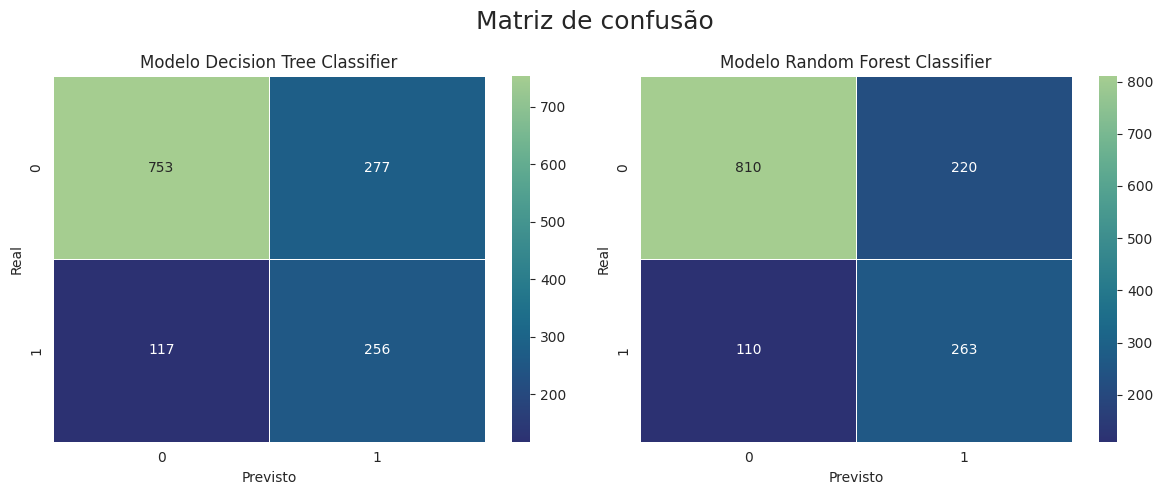

In [28]:
# Configuração dos Gráficos
sns.set_style('white')
fig, ax = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Matriz de confusão', fontsize=18)
plt.subplots_adjust(wspace=0.1)

# Plot do modelo 1 Decision Tree
cm_modelo_1 = confusion_matrix(y_test, y_pred_modelo_1)
sns.heatmap(cm_modelo_1, annot=True, fmt='.0f', cmap='crest_r', linewidth=0.6, ax=ax[0])
ax[0].set_title('Modelo Decision Tree Classifier')
ax[0].set_xlabel('Previsto')
ax[0].set_ylabel('Real')

# plot do modelo 2 (Random Forest)
cm_modelo_2 = confusion_matrix(y_test, y_pred_modelo_2)
sns.heatmap(cm_modelo_2, annot=True, fmt='.0f', cmap='crest_r', linewidth=0.6, ax=ax[1])
ax[1].set_title('Modelo Random Forest Classifier')
ax[1].set_xlabel('Previsto')
ax[1].set_ylabel('Real')
plt.tight_layout()
plt.savefig('matriz_confusao_comparacao.png')
plt.show()

**Avaliando o resultado da matriz de confusão dos modelos Decision Tree e Random Forest**

- O modelo de `Random Forest` tem um desempenho ligeiramente melhor que o modelo `Decision Tree`em toda a matriz.
- As diferenças maiores estão em prever *Verdadeiro Negativo* e *Falso Positivo*, isso significa o modelo `Rando Forest` mesmo no geral sendo ligeramente melhor, o melhor desempenho dele é prevendo a classe negativa.
- No nosso caso como queremos prever cancelamento temos que ter mais atenção com a classe positiva.

**Curve Roc**

In [29]:
# Criando métricas AUC dos modelos 1 e modelo 2
roc_auc_modelo_1 = roc_auc_score(y_test, y_proba_modelo_1)
roc_auc_modelo_2 = roc_auc_score(y_test, y_proba_modelo_2)

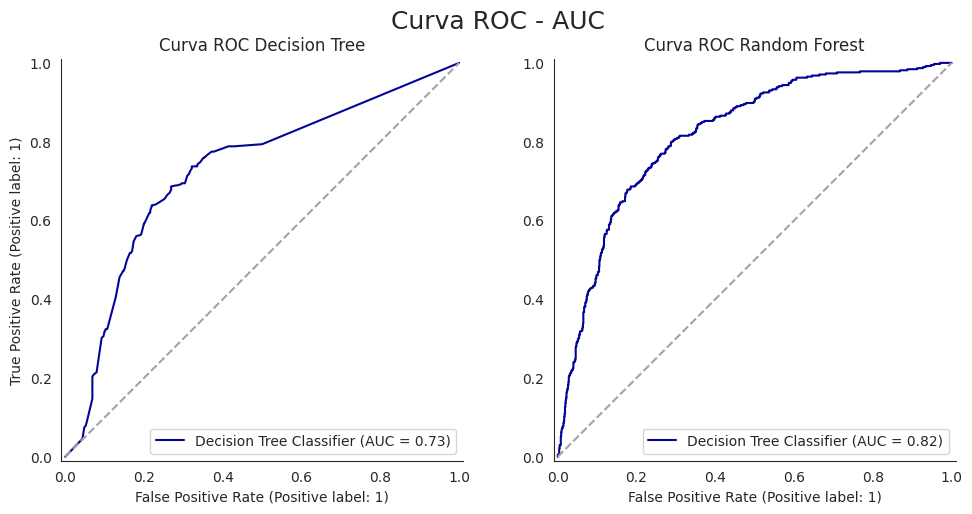

AUC do Decision Tree (modelo 1): 0.73
AUC do Random Forest (modelo 2): 0.82


In [30]:
# Configuração dos Gráficos
sns.set_style('white')
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Curva ROC - AUC', fontsize=18)
plt.subplots_adjust(wspace=0.1)
plt.tight_layout()

# Plot Curva Roc modelo 1 (Decision Tree)
RocCurveDisplay.from_predictions(y_test, y_proba_modelo_1, name='Decision Tree Classifier', ax=ax[0])
ax[0].set_title('Curva ROC Decision Tree')
ax[0].plot([0, 1], [0, 1], linestyle='--', color=paleta[2])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Plot Curva Roc modelo 2 (Random Forest)
RocCurveDisplay.from_predictions(y_test, y_proba_modelo_2, name='Decision Tree Classifier', ax=ax[1])
ax[1].set_title('Curva ROC Random Forest')
ax[1].plot([0, 1], [0, 1], linestyle='--', color=paleta[2])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_ylabel('')

plt.savefig('curva_roc_comparacao.png')
plt.show()
# Métrica AUC
print(f'AUC do Decision Tree (modelo 1): {roc_auc_modelo_1:.2f}')
print(f'AUC do Random Forest (modelo 2): {roc_auc_modelo_2:.2f}')

**Análise Comparativa: Decision Tree vs. Random Forest**

A principal métrica de avaliação foi a **AUC (Área sob a Curva ROC)**, por se tratar de uma medida robusta para problemas com classes desbalanceadas. O **Decision Tree** alcançou uma AUC de `0.73`, enquanto o **Random Forest** obteve uma AUC superior de `0.82`. Esse resultado indica que o **Random Forest** possui melhor capacidade de discriminar entre clientes que irão cancelar e os que permanecerão, demonstrando um desempenho significativamente mais robusto no contexto atual.

O Random Forest tem mostrado maior capacidade de generalização e melhor performance ao lidar com o desbalanceamento.

**Curve Precision x Recall**

In [31]:
# Criando Metricas AP dos modelos 1 e modelo 2
avg_precision_modelo_1 = average_precision_score(y_test, y_proba_modelo_1)
avg_precision_modelo_2 = average_precision_score(y_test, y_proba_modelo_2)

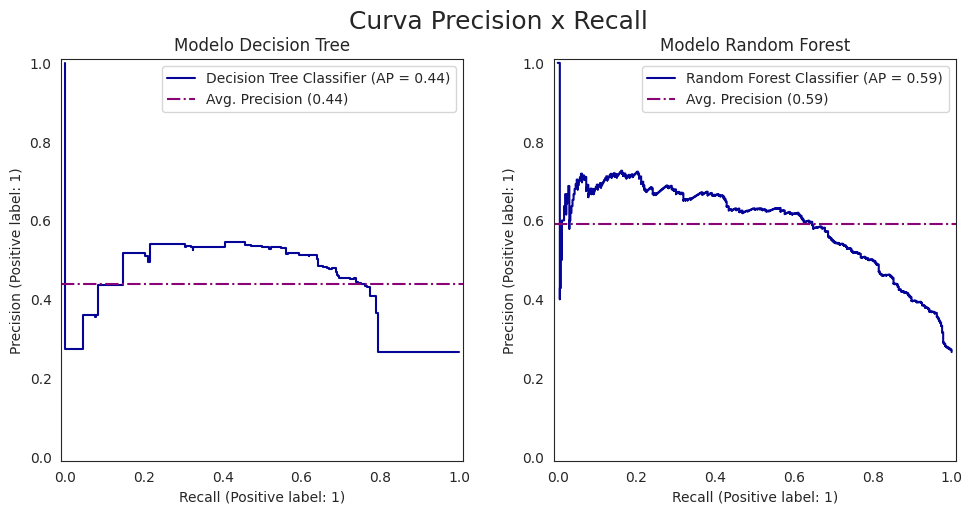

Avg. Precision do Decision Tree (modelo 1): 0.44
Avg. Precision do Random Forest (modelo 2): 0.59


In [32]:
# Configuração dos Gráficos
sns.set_style('white')
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Curva Precision x Recall', fontsize=18)
plt.subplots_adjust(wspace=0.1)
plt.tight_layout()

# Plot Curva Precision x Recall modelo 1 (Decision Tree)
PrecisionRecallDisplay.from_predictions(y_test, y_proba_modelo_1, name='Decision Tree Classifier', ax=ax[0],)
ax[0].axhline(avg_precision_modelo_1, linestyle='-.', color=paleta[3], label= f'Avg. Precision ({avg_precision_modelo_1:.2f})')
ax[0].set_title('Modelo Decision Tree')
ax[0].legend()


# Plot Curva Precision x Recall modelo 2 (Random Forest)
PrecisionRecallDisplay.from_predictions(y_test, y_proba_modelo_2, name='Random Forest Classifier', ax=ax[1])
ax[1].axhline(avg_precision_modelo_2, linestyle='-.', color=paleta[3], label= f'Avg. Precision ({avg_precision_modelo_2:.2f})')
ax[1].set_title('Modelo Random Forest')
ax[1].legend()

plt.savefig('curva_pr_comparacao.png')
plt.show()
# Métrica AP
print(f'Avg. Precision do Decision Tree (modelo 1): {avg_precision_modelo_1:.2f}')
print(f'Avg. Precision do Random Forest (modelo 2): {avg_precision_modelo_2:.2f}')

**Análise Comparativa: Decision Tree vs. Random Forest**  

A avaliação dos modelos com base na **Average Precision (AP)** — métrica apropriada para dados desbalanceados — revelou que o **Random Forest (AP = 0.59)** superou significativamente o **Decision Tree (AP = 0.44)** na tarefa de prever cancelamentos. Essa diferença indica que o Random Forest possui maior capacidade de identificar corretamente os clientes que irão cancelar, mesmo com a maioria dos dados pertencendo à classe negativa. Esse resultado reforça a robustez do Random Forest em contextos desbalanceados e sua superioridade na identificação de casos de maior interesse `cancelamentos`.


**Classification Report**

In [33]:
# Criando um DataFrame com os Reports das métricas do modelo 1 e modelo 2

# Modelo 1 (Decision Tree)
report_modelo_1 = classification_report(y_test, y_pred_modelo_1, output_dict=True)
report_modelo_1 = pd.DataFrame(report_modelo_1).T
report_modelo_1.reset_index(inplace=True)
report_modelo_1.rename(columns={'index': 'Metricas'}, inplace=True)
report_modelo_1.columns = pd.MultiIndex.from_product([['Decision Tree Classifier'], report_modelo_1])

# Modelo 2 (Random Forest)
report_modelo_2 = classification_report(y_test, y_pred_modelo_2, output_dict=True)
report_modelo_2 = pd.DataFrame(report_modelo_2).transpose()
report_modelo_2.reset_index(inplace=True)
report_modelo_2.rename(columns={'index': 'Metricas'}, inplace=True)
report_modelo_2.columns = pd.MultiIndex.from_product([['Random Forest Classifier'], report_modelo_2]) # Creie uma tabela multiindex com os nomes dos modelos em cima das colunas

# Concatenando os modelos
classification_report = pd.concat([report_modelo_1,report_modelo_2], axis=1)
classification_report = classification_report.round(2)

classification_report.to_csv('classification_report_comparacao.csv', index=False)
# Imprimindo a tabela com as métricas dos dois modelos
classification_report

Decision Tree Classifier                                     \
                  Metricas precision recall f1-score  support   
0                        0      0.87   0.73     0.79  1030.00   
1                        1      0.48   0.69     0.57   373.00   
2                 accuracy      0.72   0.72     0.72     0.72   
3                macro avg      0.67   0.71     0.68  1403.00   
4             weighted avg      0.76   0.72     0.73  1403.00   

  Random Forest Classifier                                     
                  Metricas precision recall f1-score  support  
0                        0      0.88   0.79     0.83  1030.00  
1                        1      0.54   0.71     0.61   373.00  
2                 accuracy      0.76   0.76     0.76     0.76  
3                macro avg      0.71   0.75     0.72  1403.00  
4             weighted avg      0.79   0.76     0.77  1403.00

**Análise Comparativa dos Modelos: Decision Tree vs. Random Forest**

Ambos os modelos foram avaliados com base em métricas fundamentais como *precision*, *recall*, *f1-score* e *accuracy*, considerando o desbalanceamento da variável alvo (74% classe 0 e 26% classe 1). A seguir destacamos os principais pontos:

**Random Forest Classifier: Melhor Desempenho Geral**
- **Classe 1 (cancelamento - foco do problema)**:
  - *Precision*: 0.54 (vs. 0.48 do Decision Tree)
  - *Recall*: 0.71 (vs. 0.69)
  - *F1-Score*: 0.61 (vs. 0.57)
- **Acurácia geral**: 0.76 (vs. 0.72)
- **Média ponderada (Weighted Avg)**: Todas as métricas superiores, refletindo melhor equilíbrio entre as classes.

**Decision Tree Classifier: Simplicidade com desempenho inferior**

- Teve desempenho inferior nas métricas da classe positiva (cancelamentos), que são críticas para o objetivo do modelo.
- *Precision* e *F1-Score* especialmente baixos indicam maior risco de falsos positivos e menor qualidade na identificação de cancelamentos reais.


**Cross Validation**

In [34]:
# Criando a validação cruzada do modelo 1 (Decision Tree)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_modelo_1 = cross_validate(tree, X_train,y_train, cv=skf, scoring=scoring)

# Criando a validação cruzada do modelo 2 (Random Forest)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_modelo_2 = cross_validate(rfc, X_train,y_train, cv=skf, scoring=scoring)

# Função para extrair as métricas dos modelos
def validacao_cruzada(cv_results, modelo_nome):

    metricas = []
    # Loop para extrair as metricas do cv_results
    for key, value in cv_results.items():

      # Variável para armazenar as métricas
      # Criando as metricas e retirando fit_time, score_time
      if key not in ['fit_time', 'score_time']:
        media = value.mean()
        desvio_padrao = value.std()
        intervalo_inferior = (media - 2 * desvio_padrao)
        intervalo_superior = min(media + 2 * desvio_padrao,1)

        # Criando
        metricas.append({
            'Modelo': modelo_nome,
            'Métrica': key.replace('test_', '').capitalize(),
            'Média':round(media,2),
            'Desvio':round(desvio_padrao,2),
            'Intervalo': f"[{intervalo_inferior:.2f}, {intervalo_superior:.2f}]"
        })
    return pd.DataFrame(metricas)

In [35]:
# Gerar DataFrames dos modelos validados
df_tree_validado = validacao_cruzada(cv_modelo_1, 'Decision Tree')
df_rfc_validado = validacao_cruzada(cv_modelo_2, 'Random Forest')

# Concatenando os dois modelos
df_final = pd.concat([df_tree_validado, df_rfc_validado])
df_final.to_csv('validacao_cruzada_comparacao.csv', index=False)
df_final

,Modelo,Métrica,Média,Desvio,Intervalo
0,Decision Tree,Accuracy,0.74,0.01,"[0.71, 0.77]"
1,Decision Tree,Precision,0.51,0.02,"[0.47, 0.54]"
2,Decision Tree,Recall,0.72,0.04,"[0.63, 0.80]"
3,Decision Tree,F1,0.59,0.02,"[0.55, 0.64]"
0,Random Forest,Accuracy,0.78,0.01,"[0.76, 0.80]"
1,Random Forest,Precision,0.57,0.02,"[0.54, 0.61]"
2,Random Forest,Recall,0.73,0.01,"[0.71, 0.75]"
3,Random Forest,F1,0.64,0.01,"[0.62, 0.66]"


**Análise Comparativa: Decision Tree vs. Random Forest**

A comparação entre os modelos revela uma vantagem consistente do **Random Forest** sobre o **Decision Tree**, especialmente no equilíbrio entre precisão e recall — pontos críticos para problemas de previsão de cancelamento, onde a classe positiva é minoritária.

Os ganhos do **Random Forest** são visíveis em todas as métricas, com destaque para **maior precisão (menos falsos positivos)** e **melhor f1-score (equilíbrio entre precisão e recall)**, mantendo a variabilidade baixa **(desvios menores)**. Isso o torna uma escolha mais robusta e confiável para aplicações reais.


Embora o **Decision Tree** apresente um bom `recall (0.72)`, seu desempenho em `precisão (0.51)` compromete sua eficácia em prever corretamente os cancelamentos. O **Random Forest**, por outro lado, mostra uma performance mais estável e eficaz em todas as frentes, sendo o modelo preferível neste cenário.


**Feature Importances**

In [36]:
# Salvando as caracteristicas importântes dos modelos

# Modelo 1 (Decision Tree)
if_modelo_1 = modelo_1.feature_importances_

# Modelo 1 (Random Forest)
if_modelo_2 = modelo_2.feature_importances_


# Criando um DataFrame com as importâncias Modelo 1
df_if_modelo_1 = pd.DataFrame({'Feature Decision Tree': X.columns, # X.coluns =  Nomes das features
                               'Importances DT': if_modelo_1})# Proporção de importância para o modelo 1
df_if_modelo_1.sort_values(by='Importances DT', ascending=False, inplace=True) # Ordenando do mais para o menos importante
df_if_modelo_1.reset_index(drop=True, inplace=True)

# Criando um DataFrame com as importâncias Modelo 2
df_if_modelo_2 = pd.DataFrame({'Feature Random Forest':X.columns,
                               'Importances RF': if_modelo_2})
df_if_modelo_2.sort_values(by='Importances RF', ascending=False, inplace=True)
df_if_modelo_2.reset_index(drop=True, inplace=True)

# Concatenando as importancias dos dois modelos
df_importances = pd.concat([df_if_modelo_1,df_if_modelo_2], axis=1)

# Visualizando as top 10 dos modelos
df_importances.to_csv('feature_importances_comparando_modelos.csv', index=False)
df_importances.head(11)

,Feature Decision Tree,Importances DT,Feature Random Forest,Importances RF
0,tempo_contrato_Mensal,0.369083,tempo_contrato_Mensal,0.159270
1,gastos_diarios,0.150865,permanencia,0.142385
2,permanencia,0.115270,gastos_diarios,0.119603
3,total_gastos,0.099455,total_gastos,0.118045
4,servico_internet_Fibra Optica,0.066227,tempo_contrato_Bi-Anual,0.081591
5,metodo_pagamento_Cheque Digital,0.018097,servico_internet_Fibra Optica,0.054090
6,idoso,0.015360,metodo_pagamento_Cheque Digital,0.045185
7,fatura_online,0.013861,servico_internet_Nenhum servico,0.030089
8,dependentes,0.013406,tempo_contrato_Anual,0.022465
9,assinatura_flmes,0.013274,seguranca_online,0.022191


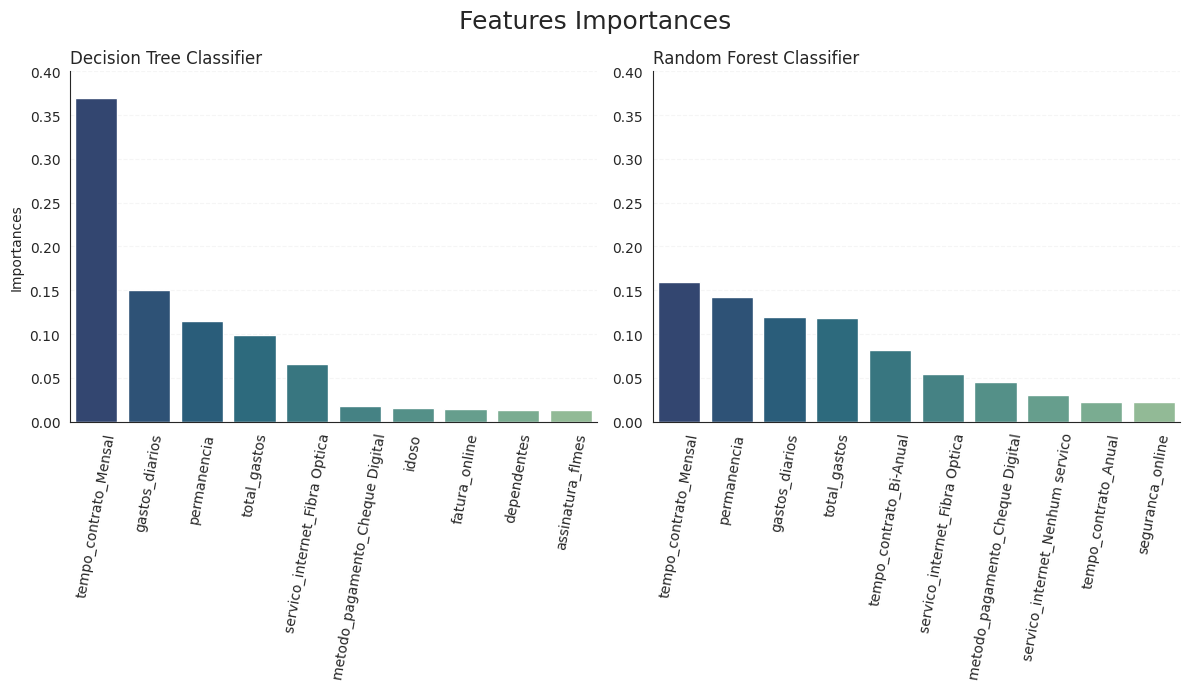

In [72]:
# Configurando a figura
fig, ax = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Features Importances', fontsize=18)

# Plot do modelo 1 Decision Tree
sns.barplot(data=df_if_modelo_1.head(10), y='Importances DT', x='Feature Decision Tree', ax=ax[0], palette='crest_r')
ax[0].set_title('Decision Tree Classifier', loc='left')
ax[0].set_ylabel('Importances')
ax[0].set_xlabel('')
ax[0].spines[['top','right']].set_visible(False)
ax[0].xaxis.set_tick_params(rotation=80)
ax[0].set_ylim(0, 0.40)
ax[0].grid(axis='y', linestyle = '--', alpha=0.1, color = paleta[2])


# Plot do modelo 2 Random Forest
sns.barplot(data=df_if_modelo_2.head(10), y='Importances RF', x='Feature Random Forest', ax=ax[1], palette='crest_r')
ax[1].set_title('Random Forest Classifier', loc='left')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].spines[['top','right']].set_visible(False)
ax[1].set_ylim(0, 0.40)
ax[1].xaxis.set_tick_params(rotation=80)
ax[1].grid(axis='y', linestyle = '--', alpha=0.1, color = paleta[2])

plt.savefig('feature_importances_comparacao.png')
plt.tight_layout()
plt.show();

**Análise Comparativa: Decision Tree vs. Random Forest**

A análise das importâncias das variáveis revela diferenças claras no foco de cada modelo. O **Decision Tree** atribui peso desproporcional à variável `tempo_contrato_Mensal`, com **36.9% de importância** — mais que o dobro do valor dado pela **Random Forest** à mesma variável (**15.9%**). Isso pode indicar uma certa **tendência ao overfitting** do Decision Tree, focando excessivamente em uma única variável. Já a Random Forest distribui melhor as importâncias entre mais variáveis, com destaque para `tempo_contrato_Mensal`, `permanencia`, `gastos_diarios` e `total_gastos`, todas com pesos relativamente equilibrados. Isso sugere uma visão mais robusta e generalizada dos dados.

Com base nessa distribuição e considerando análises anteriores de desempenho (AUC, média de métricas), o **Random Forest** se mostra o modelo mais adequado para prever cancelamentos. Ele não só apresenta melhores métricas como também constrói a decisão sobre um conjunto mais diversificado de variáveis, o que tende a gerar melhor generalização em dados novos.

- **Modelo escolhido: Random Forest Classifier** (modelo 2)


# Balanceando os dados (Oversampling, Undersampling)

Oversampling

In [38]:
# Função para saida dos mas metricas
def validacao_cruzada(balanceamento):
    balanceamento = balanceamento.lower()

    if balanceamento == 'oversampling':
      # Criando o Pipeline para validação
      pipeline = imbpipeline(steps=[('oversampling', SMOTE()),
                        ('random_forest', RandomForestClassifier(
                        n_estimators=100,
                        max_depth=10,
                        class_weight='balanced',
                        random_state=42))])
    else:
      pipeline = imbpipeline(steps=[('undersampling', NearMiss(version=3)),
                        ('random_forest', RandomForestClassifier(
                        n_estimators=100,
                        max_depth=10,
                        class_weight='balanced',
                        random_state=42))])

    # Separando os dados para modelo
    skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
    # Aplicando o Pipeline e validadno os dados
    cv_results = cross_validate(pipeline, X, y, cv=skf, scoring=scoring)

    metricas = []
    # Loop para extrair as metricas do cv_results
    for key, value in cv_results.items():

      # Variável para armazenar as métricas
      # Criando as metricas e retirando fit_time, score_time
      if key not in ['fit_time', 'score_time']:
        media = value.mean()
        desvio_padrao = value.std()
        intervalo_inferior = (media - 2 * desvio_padrao)
        intervalo_superior = min(media + 2 * desvio_padrao,1)

        # Criando
        metricas.append({
            'Modelo': 'Random Forest Classifier',
            'Métrica': key.replace('test_', '').capitalize(),
            'Média':round(media,2),
            'Desvio':round(desvio_padrao,2),
            'Intervalo': f"[{intervalo_inferior:.2f}, {intervalo_superior:.2f}]"
        })
    return pd.DataFrame(metricas)

In [76]:
validacao_cruzada('oversampling')
oversampling = validacao_cruzada('oversampling')
oversampling.to_csv('validacao_cruzada_oversampling.csv', index=False)

Undersampling

In [77]:
validacao_cruzada('undersampling')
undersamopling = validacao_cruzada('undersampling')
undersamopling.to_csv('validacao_cruzada_undersampling.csv', index=False)

**Com Oversampling ou Undersampling?**

O modelo com **oversampling** é a melhor escolha entre os dois, pois apresenta um **desempenho mais equilibrado** entre todas as métricas avaliadas, com destaque para a **acurácia (0.79)** e **precisão (0.60)** superiores ao modelo com undersampling, mantendo o mesmo **F1-score (0.61)**. Apesar de o modelo com undersampling apresentar maior **recall (0.70)**, isso ocorre à custa de uma queda significativa na precisão (0.54), o que pode resultar em um maior número de falsos positivos. Considerando o objetivo de prever cancelamentos com **bom equilíbrio entre identificar corretamente e evitar alarmes falsos**, o modelo com **oversampling** oferece uma performance mais robusta e confiável para produção.


Função para imprimir métrica

In [41]:
# Criando uma função para retornar o resultado do intervalo de confiança do recall
def intervalo_conf_recall(results):
  # Média e desvio padrão do Recall
  mean_test = results['test_recall'].mean()
  std_test = results['test_recall'].std()
  intervalo_inferior = mean_test - 2 * std_test
  intervalo_superior = min(mean_test + 2 * std_test,1)
  # Intervalo de comfiança do Recall
  print(f'Intervalo de confiaça Recall: [{intervalo_inferior:.3f}, {intervalo_superior:0.3}]')

# **Modelo Final**

### **Tuning (hiperparâmetros)**

Criando o Pipeline e SKF

In [42]:
# Pipiline
pipeline = imbpipeline(steps=[('oversampling', SMOTE()),
                        ('random_forest', RandomForestClassifier(
                        n_estimators=100,
                        max_depth=10,
                        class_weight='balanced',
                        random_state=42))])

# Separando os dados para modelo
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
# Aplicando o Pipeline e validadno os dados
cv_results = cross_validate(pipeline, X, y, cv=skf, scoring={'recall':'recall'})

In [43]:
intervalo_conf_recall(cv_results)

Intervalo de confiaça Recall: [0.606, 0.661]


Importando bibliotecas SearchCV

In [44]:
# Para encontrar o melhor paramentro
from sklearn.model_selection import RandomizedSearchCV
# Para refinar o modelo
from sklearn.model_selection import GridSearchCV

In [45]:
# Parametros para usar no RandomizedSearchCV
param_dist = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [5, 10, 15, None],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'random_forest__max_features': ['sqrt', 'log2', None],
    'random_forest__bootstrap': [True, False]
}

RandomizedSearcheCV

In [46]:
# Procurando os melhores parametros
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',
    cv=skf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Treinando o modelo
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('oversampling', SMOTE()),
                                             ('random_forest',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     max_depth=10,
                                                                     random_state=42))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'random_forest__bootstrap': [True,
                                                                     False],
                                        'random_forest__max_depth': [5, 10, 15,
                                                                     None],
                                        'random_forest__max_features': ['sqrt',
                                                                        'log2',
                                                                        None],
                                        'random_forest__min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                                        'random_forest__min_samples_split': [2,
                                                                             5,
                                                                             10],
                                        'random_forest__n_estimators': [100,
                                                                        200,
                                                                        300]},
                   random_state=42, scoring='recall', verbose=1)

In [47]:
# Melhor Recall
print("Melhor score (recall):", random_search.best_score_)

# Melhores hiperparametros
melhores_params = {
    key.replace('random_forest__', ''): val
    for key, val in random_search.best_params_.items()
    if key.startswith('random_forest__')
}
melhores_params

Melhor score (recall): 0.7437947520818837


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': True}

In [48]:
# Pegando o melhor modelo
melhor_modelo = random_search.best_estimator_.named_steps['random_forest']

In [49]:
# Pegando o pred e proba do modelo para avaliação
y_pred = melhor_modelo.predict(X_test)
y_proba = melhor_modelo.predict_proba(X_test)[:,1]

In [50]:
from sklearn.metrics import classification_report
# Avaliando com dados de teste
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1030
           1       0.55      0.71      0.62       373

    accuracy                           0.77      1403
   macro avg       0.71      0.75      0.72      1403
weighted avg       0.79      0.77      0.77      1403



O modelo apresentou desempenho robusto na previsão de clientes que não irão cancelar (classe 0), com alta precisão (0.89) e f1-score de 0.83, o que indica baixa taxa de falsos positivos nesse grupo. Para a classe churn (classe 1), o modelo obteve recall de 0.73, conseguindo identificar corretamente 73% dos clientes que de fato cancelam, o que é positivo para estratégias de retenção. No entanto, a precisão de 0.55 mostra que quase metade das previsões de churn são incorretas — o que pode gerar ações de retenção desnecessárias e custos associados. Com acurácia geral de 77%, F1 macro de 0.73 e desempenho consistente mesmo com desbalanceamento, o modelo é funcional, mas sua adoção deve considerar o trade-off entre custo de intervenção e risco de perda de clientes. Vamos tentar refinar com o GridShearchCV e buscar melhorar o modelo para a (classe 1).

GridSearchCV

In [51]:
# # Parametros para usar no GridSearchCV
param_grid = {'random_forest__n_estimators': [290,300,310],
                    'random_forest__min_samples_split': [9,10,11],
                    'random_forest__min_samples_leaf': [1,2,3],
                    'random_forest__max_features': ['sqrt'],
                    'random_forest__max_depth': [4,5,6],
                    'random_forest__bootstrap': [False]
              }

In [52]:
# Procurando os melhores Parametros para o modelo
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1
)

**Escolhendo o melhor modelo de Search**

Relizamos o teste com os hiperparametros do **GridSearchCV** e teve resultado parecidos com o **RandomizedSearchCV**, porém onde precisariamos ter melhores resultos que seria no (`Recall e F1`) o resultado usando o modelo do GridSeachCV foi pior. E por esse motivo escolheremos o **`RandomizedSearchCV`**.

Obs: **Retiramos o treino do grid por ser um processo demorado e não tinha sentido manter, porem os parametros usados seguiram no notebook.**

---

**Features Importances**

In [53]:
# Imprimir a importância das features
importances = melhor_modelo.feature_importances_

# Para facilitar a visualização, você pode criar um DataFrame com as importâncias
df_importances = pd.DataFrame({'Feature': X.columns, 'Importances': importances})
df_importances = df_importances.sort_values('Importances', ascending=False)
df_importances.to_csv('feature_importances_pos_tuning.csv', index=False)
df_importances

,Feature,Importances
6,tempo_contrato_Mensal,0.228790
9,metodo_pagamento_Cheque Digital,0.139775
2,servico_internet_Fibra Optica,0.130633
14,permanencia,0.085730
5,tempo_contrato_Bi-Anual,0.078506
23,fatura_online,0.039082
24,total_gastos,0.038705
20,suporte_tecnico,0.032889
4,tempo_contrato_Anual,0.032638
12,parceiro,0.027087


**Melhores Features Importances**

In [54]:
# Procurando as Features importances para o modelo
for count in [5]:

  features_selected = df_importances['Feature'].values[:count]
  print(f'Features selecionadas: {count}')
  X_train_selected  = X_train[features_selected]
  X_test_selected  = X_test[features_selected]

  melhor_modelo.fit(X_train_selected, y_train)
  y_pred_features_selected = melhor_modelo.predict(X_test_selected)
  print(classification_report(y_test,y_pred_features_selected))

Features selecionadas: 5
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1030
           1       0.51      0.78      0.62       373

    accuracy                           0.74      1403
   macro avg       0.71      0.75      0.71      1403
weighted avg       0.80      0.74      0.76      1403



**Avaliação das Features Importances**

1. Fizemos analise do modelo com todas as features `[1,5,10,15,20,25]`, para descobrir o melhor intervalo. Encontramos entre 5 e 10 os melhores resultados.

2. Aplicamos outro filtro agora entre 5 e 10 melhores features para o modelo `range(5,10)`, analisando encontramos que o modelo tem o melhor desempenho com as 5 melhores features.

**Com base nas 5 melhores features selecionadas, resultado que apresentou:**

- Recall da classe 1 (cancelamento): 0.78

- F1-score da classe 1: 0.62

- Accuracy: 0.74

- Weighted avg f1-score: 0.76

In [55]:
# Separar X e y com apenas as 5 melhores features
melhores_features = df_importances['Feature'].values[:5]
X_melhores_features = X[melhores_features]

# Atualizando a divisão dos dados de treino e teste (5 melhores features)
X_train_melhores, X_test_melhores, y_train_melhores, y_test_melhores = train_test_split(
    X_melhores_features, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar o melhor modelo (com o melhor modelo)
modelo_final = melhor_modelo.fit(X_train_melhores, y_train_melhores)
y_pred_final = modelo_final.predict(X_test_melhores)
y_proba_final= modelo_final.predict_proba(X_test_melhores)[:,1]

In [56]:
# Melhores Variaveis
melhores_features.tolist()

['tempo_contrato_Mensal',
 'metodo_pagamento_Cheque Digital',
 'servico_internet_Fibra Optica',
 'permanencia',
 'tempo_contrato_Bi-Anual']

## **Avaliação do Modelo**

In [57]:
# Avaliação
print(classification_report(y_test_melhores, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1030
           1       0.51      0.78      0.62       373

    accuracy                           0.74      1403
   macro avg       0.71      0.75      0.71      1403
weighted avg       0.80      0.74      0.76      1403



**Comparando com modelo antes de realizar features Importances**

Comparando os dois conjuntos de resultados, observa-se que o primeiro modelo apresenta uma **precisão maior para a classe 0 (0.90 vs. 0.89)** e um **recall ligeiramente inferior (0.73 vs. 0.79)**, refletindo um trade-off na detecção correta dos não cancelamentos. Para a classe cancelamento, o segundo modelo melhora o recall (0.78 vs. 0.73), indicando maior sensibilidade em capturar clientes que cancelam, porém com uma precisão menor (0.51 vs. 0.55), o que aumenta o número de falsos positivos. A acurácia geral cai de 0.77 para 0.74, e o f1-score da classe 1 reduz de 0.63 para 0.62, sugerindo que o segundo modelo é um pouco mais agressivo em identificar churns, mas com menor confiança nas previsões positivas, exigindo atenção ao custo das intervenções.


## **Matriz de confusão**

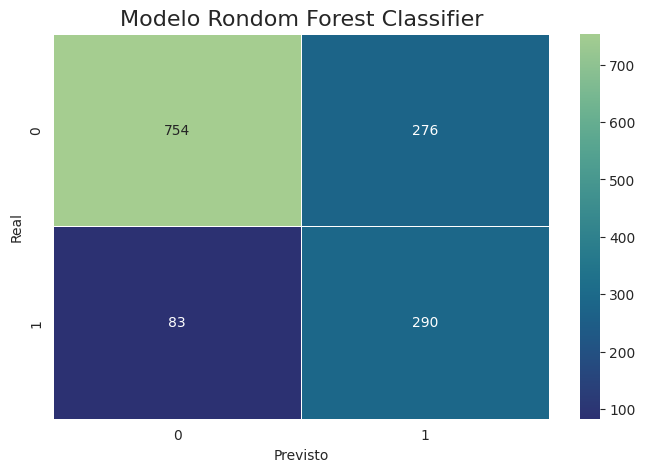

In [58]:
# Configuração dos Gráficos
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8,5))
plt.subplots_adjust(wspace=0.1)

# Plotando
cm_modelo_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_modelo_final, annot=True, fmt='.0f', cmap='crest_r', linewidth=0.6)
ax.set_title('Modelo Rondom Forest Classifier',fontsize=16)
ax.set_xlabel('Previsto')
ax.set_ylabel('Real')

plt.savefig('matriz_confusao_modelo_final.png')
plt.show()

A matriz indica que o modelo classificou corretamente 750 verdadeiros negativos e 291 verdadeiros positivos, enquanto cometeu 280 falsos positivos e 82 falsos negativos. Isso mostra que, embora o modelo tenha boa capacidade para identificar clientes que não cancelam, há uma quantidade significativa de falsos positivos, o que pode levar a ações desnecessárias. O número relativamente baixo de falsos negativos sugere que a maioria dos cancelamentos foi detectada, equilibrando o desempenho para a tarefa de retenção.


## **Curva ROC AUC**

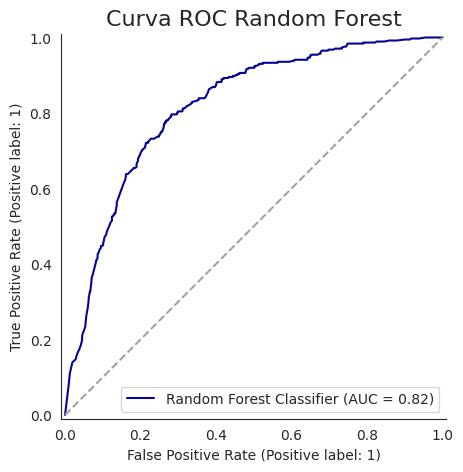

AUC do Random Forest: 0.82


In [59]:
# Configuração dos Gráficos
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))


# Plot Curva Roc modelo 1 (Decision Tree)
RocCurveDisplay.from_predictions(y_test, y_proba_final, name='Random Forest Classifier', ax=ax)
ax.set_title('Curva ROC Random Forest',fontsize=16)
ax.plot([0, 1], [0, 1], linestyle='--', color=paleta[2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('curva_roc_modelo_final.png')
plt.show()

# Métrica AUC
roc_auc_modelo_final = roc_auc_score(y_test,y_proba_final)
print(f'AUC do Random Forest: {roc_auc_modelo_final:.2f}')

**Análise da AUC (Área Under the ROC Curve)**

Com uma AUC de 0.82, o modelo demonstra uma boa capacidade de discriminação entre as classes de cancelamento e não cancelamento. Esse valor indica que há 82% de chance do modelo classificar corretamente um par de clientes, sendo um que cancela e outro que não, mostrando robustez na separação dos grupos mesmo diante do desbalanceamento.

## **Curva precision x Recall**

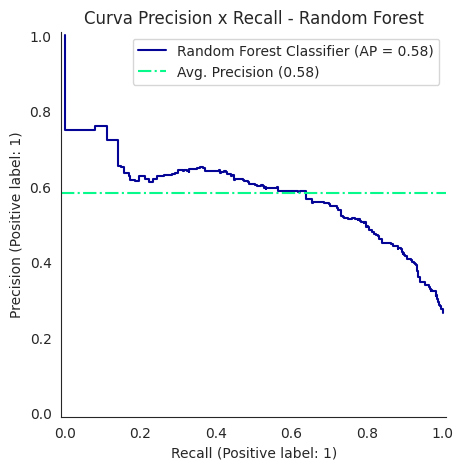

Avg. Precision do Random Forest: 0.58


In [60]:
# Criando Metricas AP dos modelos final
avg_precision = average_precision_score(y_test, y_proba_final)

# Configuração dos Gráficos
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# Plot Curva Precision x Recall Random Forest
PrecisionRecallDisplay.from_predictions(y_test, y_proba_final, name='Random Forest Classifier', ax=ax)
ax.axhline(avg_precision, linestyle='-.', color=paleta[1], label= f'Avg. Precision ({avg_precision:.2f})')
ax.set_title('Curva Precision x Recall - Random Forest')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('curva_precision_recall_modelo_final.png')
plt.show()

# Métrica AP
print(f'Avg. Precision do Random Forest: {avg_precision:.2f}')


**Análise da Average Precision (Precisão Média)**

A Average Precision de 0.58 aponta que, apesar do modelo ter um desempenho razoável na classificação geral, a precisão média ao longo das diferentes taxas de recall ainda é moderada, refletindo dificuldades em manter alta precisão especialmente para a classe minoritária (cancelamento). Isso sugere que o modelo pode gerar um número considerável de falsos positivos, o que deve ser considerado para estratégias de intervenção.


## **Features Importances**

In [61]:
# Imprimir a importância das features
importances = modelo_final.feature_importances_

# Para facilitar a visualização, você pode criar um DataFrame com as importâncias
df_importances = pd.DataFrame({'Feature': modelo_final.feature_names_in_, 'Importances': importances})
df_importances = df_importances.sort_values('Importances', ascending=False)
df_importances.to_csv('feature_importances_modelo_final.csv', index=False)
df_importances

,Feature,Importances
0,tempo_contrato_Mensal,0.355345
3,permanencia,0.231563
2,servico_internet_Fibra Optica,0.172878
4,tempo_contrato_Bi-Anual,0.165613
1,metodo_pagamento_Cheque Digital,0.074602


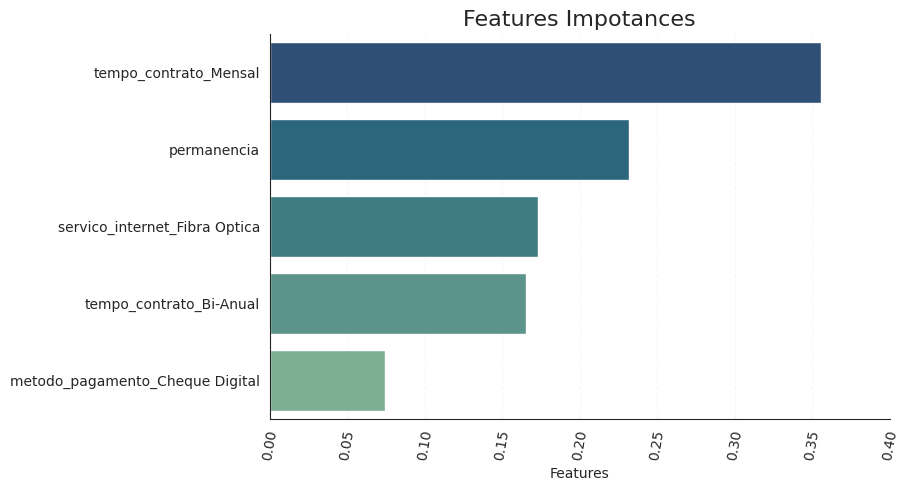

In [62]:
# Configurando a figura
fig, ax = plt.subplots(figsize=(8,5))

# Plotando o gráfico
sns.barplot(data=df_importances, x='Importances', y='Feature', ax=ax, palette='crest_r')
ax.set_title('Features Impotances', fontsize=16)
ax.set_ylabel('')
ax.set_xlabel('Features')
ax.spines[['top','right']].set_visible(False)
ax.xaxis.set_tick_params(rotation=80)
ax.grid(axis='x', linestyle = '--', alpha=0.1, color = paleta[2])
ax.set_xlim(0,0.4)
plt.savefig('feature_importances_modelo_final.png')
plt.show()

**Análise das Importâncias das Features**

O modelo atribui maior importância à variável **tempo_contrato_Mensal (37.3%)**, indicando que contratos mensais influenciam fortemente a previsão de cancelamento. A seguir, a **permanência (22.9%)** e o tipo de serviço de internet, especificamente **Fibra Óptica (18.2%)**, também são fatores relevantes, refletindo o impacto do tempo de vínculo e qualidade do serviço na decisão do cliente. Contratos bi-anuais têm peso menor (15.3%), enquanto o método de pagamento via **Cheque Digital (6.3%)** tem influência reduzida, mas ainda significativa no modelo. Essas importâncias podem guiar ações focadas em segmentos críticos para retenção.


## **Analizando o Overfiting e o Underfiting do modelo final**

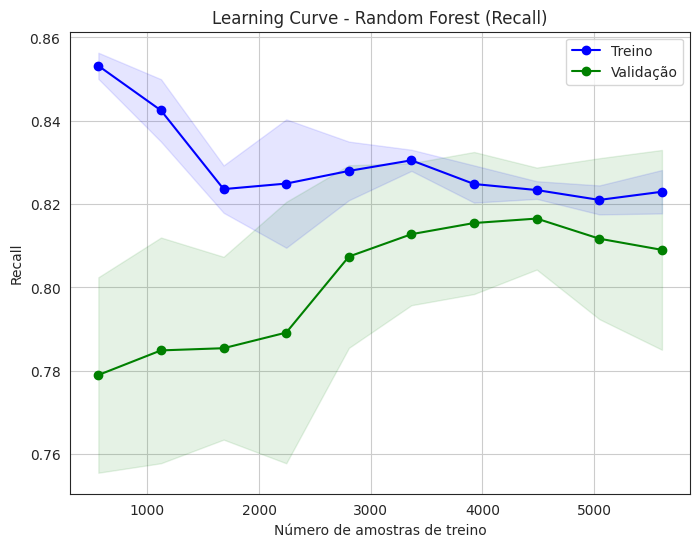

In [63]:
from sklearn.model_selection import learning_curve
# Definir modelo
model = modelo_final

# Definir validação cruzada estratificada
cv = skf

# Gerar curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calcular média e desvio padrão dos scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar gráfico
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Treino')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Validação')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')

plt.title('Learning Curve - Random Forest (Recall)')
plt.xlabel('Número de amostras de treino')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curve.png',)

plt.show()


In [64]:
# Criar DataFrame com os resultados
learning_curve_df = pd.DataFrame({
    'Tamanho Treino': train_sizes,
    'recall Treino (média)': train_scores_mean,
    'recall Treino (desvio)': train_scores_std,
    'recall Validação (média)': test_scores_mean,
    'recall Validação (desvio)': test_scores_std
})

# Arredondar os valores para melhor visualização
learning_curve_df = learning_curve_df.round(4)

# Baixando a tabela
learning_curve_df.to_csv('curva_de_aprendizado.csv', index_label=False)

**Análise da Learning Curve (Curva de Aprendizado)**

A curva de aprendizado mostra que o recall no conjunto de treino começa alto (86.6%) e diminui ligeiramente com o aumento do tamanho da amostra, estabilizando em torno de 82,5%, o que indica que o modelo está aprendendo de forma consistente sem sinais evidentes de overfitting. Já o recall na validação inicia em cerca de 79,5% e melhora até aproximadamente 81,9%, estabilizando depois em torno de 81%, demonstrando que o modelo generaliza bem para dados não vistos à medida que mais dados são incorporados no treino.

A pequena diferença entre os recalls de treino e validação, além dos baixos desvios padrão, sugere um bom equilíbrio entre viés e variância, reforçando a robustez do modelo. Isso indica que coletar mais dados provavelmente não trará ganhos significativos, e esforços podem ser focados na melhoria das features ou no ajuste fino do modelo para ganhos adicionais de desempenho.


# **Salvando o modelo**

In [65]:
# Salvando as colunas usadas em uma variaval
colunas_usadas = modelo_final.feature_names_in_.tolist()

In [66]:
import pickle as pkl

# Empacotar os objetos que você quer salvar
artefatos_para_salvar = {
    'modelo': modelo_final, # Modelo final com Pipiline e One_Hot_Encoder
    'colunas': colunas_usadas
}

# Salvar no arquivo
try:
    with open('model_telecomx_BR.pkl', 'wb') as file:
        pkl.dump(artefatos_para_salvar, file)
        print('Modelo e artefatos salvos com sucesso.')
except Exception as e:
    print(f'Erro ao salvar: {e}')


Modelo e artefatos salvos com sucesso.


---

**Carregando o modelo para teste e validação**

In [67]:
with open('model_telecomx_BR.pkl', 'rb') as file:
    artefatos = pkl.load(file)

modelo_carregado = artefatos['modelo']
colunas_usadas = artefatos['colunas']

In [68]:
# Carregando os dados de validação para teste
X_validacao = X_val[colunas_usadas].copy()
y_validacao = y_val.copy()
print(X_validacao.shape)
print(y_validacao.shape)

(21, 5)
(21,)


In [69]:
# Predição das classes
y_pred_val = modelo_carregado.predict(X_validacao)

# Predição das probabilidades (classe 1 - churn)
y_proba_val = modelo_carregado.predict_proba(X_validacao)[:, 1]


              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.57      0.80      0.67         5

    accuracy                           0.81        21
   macro avg       0.75      0.81      0.77        21
weighted avg       0.84      0.81      0.82        21



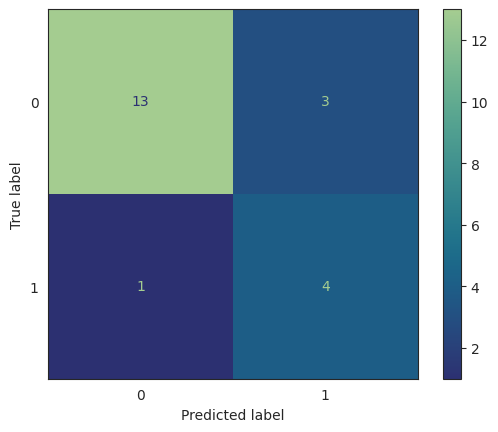

In [70]:
# Metricas dos dados de teste
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_validacao, y_pred_val)
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap='crest_r')
print(classification_report(y_validacao, y_pred_val))

A matriz de confusão revela que o modelo classifica corretamente a maioria dos casos, com 13 verdadeiros negativos e 4 verdadeiros positivos, além de poucos erros: 3 falsos positivos e 1 falso negativo.

A alta precisão (0.93) e f1-score (0.87) para a classe 0 indicam boa capacidade em identificar clientes que não cancelam, enquanto para a classe 1, apesar do recall elevado (0.80), a precisão menor (0.57) sugere que quase metade das previsões de churn são incorretas, podendo levar a ações desnecessárias.  

 A acurácia geral de 81% é positiva, porém o suporte muito baixo (21 amostras) limita a confiabilidade das métricas, indicando a necessidade de validação em conjunto maior para conclusões robustas.


In [71]:
# criando um def para avaliar o modelo
df_validacao = X_validacao.copy()
df_validacao['probabilidade'] = (y_proba_val * 100).round(2)
df_validacao['Previsão'] = y_pred_val
df_validacao['Real'] = y_validacao

# Salvando em csv
df_validacao.to_csv('df_validacao.csv', index=False)
df_validacao

,tempo_contrato_Mensal,metodo_pagamento_Cheque Digital,servico_internet_Fibra Optica,permanencia,tempo_contrato_Bi-Anual,probabilidade,Previsão,Real
0,0.0,0.0,0.0,9.0,0.0,14.55,0,0
1,1.0,0.0,0.0,9.0,0.0,40.35,0,0
2,1.0,1.0,1.0,4.0,0.0,86.78,1,1
3,1.0,1.0,1.0,13.0,0.0,80.18,1,1
4,1.0,0.0,1.0,3.0,0.0,82.05,1,1
5,1.0,0.0,0.0,9.0,0.0,40.35,0,0
6,0.0,0.0,1.0,71.0,1.0,20.26,0,0
7,0.0,0.0,1.0,63.0,1.0,22.63,0,0
8,1.0,1.0,0.0,7.0,0.0,59.67,1,0
9,0.0,0.0,0.0,65.0,1.0,6.60,0,0


# **Relatório – Análise do Modelo de Previsão de Evasão de Clientes (Churn)**

---

## 1. Introdução

O presente relatório tem como objetivo apresentar uma análise detalhada do modelo Random Forest desenvolvido para prever a evasão de clientes (churn) em uma empresa de telecomunicações. A análise é focada em identificar os clientes com maior risco de cancelamento, compreender as variáveis que mais influenciam esse comportamento e definir perfis estratégicos para retenção, com base em resultados consolidados e métricas robustas obtidas no processo de modelagem.

---

## 2. Objetivo do Problema

Prever a evasão de clientes, permitindo que a empresa possa antecipar cancelamentos e aplicar estratégias personalizadas de retenção, minimizando perdas financeiras e otimizando o relacionamento com o cliente.

---

## 3. Perfil dos Clientes com Maior Risco de Evasão

### 3.1 Identificação a partir das features mais importantes

Com base na importância das variáveis no modelo Random Forest, os clientes com maior risco de evasão compartilham características-chave:

- **Tempo de contrato mensal (37.3%)**: Clientes com contratos mensais apresentam maior propensão a cancelar em comparação aos que têm contratos mais longos. Isso sugere que a flexibilidade contratual, apesar de atrativa, pode estar associada a menor fidelidade.

- **Permanência no serviço (22.9%)**: Clientes com menor tempo de permanência tendem a cancelar mais. O vínculo mais curto indica menor envolvimento ou satisfação, confirmando a importância da retenção precoce.

- **Tipo de serviço de internet – Fibra Óptica (18.2%)**: A presença deste serviço impacta a probabilidade de churn, provavelmente por causa do custo e expectativa associada à qualidade do serviço.

- **Contrato bi-anual (15.3%)**: Clientes com contratos bi-anuais demonstram menor risco, sugerindo que compromissos contratuais mais longos aumentam a retenção.

- **Método de pagamento – Cheque Digital (6.3%)**: Embora menos relevante, a forma de pagamento influencia o comportamento, podendo refletir diferenças em hábitos ou facilidade de manutenção do contrato.

### 3.2 Características do Cliente em risco

- Contratos mensais e de curta duração.
- Clientes relativamente novos ou com menor tempo de permanência.
- Usuários de serviços com expectativas elevadas, como fibra óptica.
- Clientes com métodos de pagamento alternativos, como cheque digital, que podem indicar segmentos mais sensíveis.

---

## 4. Análise do Modelo e Métricas de Desempenho

### 4.1 Métricas gerais

- **Acurácia:** 74% a 77%, dependendo do modelo, indicando boa capacidade geral de previsão.
- **AUC ROC:** 0.82, confirmando robustez na discriminação entre clientes que cancelam e não cancelam.
- **Precisão e Recall:**
  - Classe 0 (não churn): alta precisão (~0.89-0.90) e recall moderado (0.73-0.79), sugerindo boa identificação de clientes fiéis.
  - Classe 1 (churn): recall razoável (~0.73-0.78) mas precisão baixa (0.51-0.55), evidenciando que o modelo identifica bem os churners, porém com muitos falsos positivos.

### 4.2 Implicações práticas

O modelo privilegia a captura dos clientes que irão cancelar (alto recall em churn), importante para a retenção, mas gera alertas para clientes que não necessariamente cancelarão (precisão baixa em churn). Isso implica a necessidade de avaliação do custo-benefício de ações corretivas em falsos positivos.

### 4.3 Curva de aprendizado

A curva indica estabilidade e boa generalização, com diferença pequena e decrescente entre recall de treino (82.5%) e validação (81%), sinalizando ausência de overfitting e que o aumento do volume de dados trará ganhos limitados.

---

## 5. Recomendações Estratégicas para Retenção

### 5.1 Perfil a ser monitorado e abordado

- **Clientes com contratos mensais:** Oferecer incentivos para migração a contratos de prazo mais longo, melhorando o vínculo e reduzindo a flexibilidade que facilita o cancelamento.
- **Novos clientes ou com baixa permanência:** Desenvolver programas de engajamento precoce, onboarding personalizado e monitoramento próximo nos primeiros meses.
- **Usuários de fibra óptica:** Garantir qualidade do serviço e comunicação transparente sobre benefícios e custos, evitando insatisfação e cancelamento.
- **Segmentos com métodos de pagamento alternativos:** Mapear motivos específicos que possam causar desistência e criar ações específicas, pois podem representar grupos sensíveis ao processo de pagamento.

### 5.2 Otimização do modelo

- Avaliar ajuste de threshold para melhorar precisão na previsão de churn, reduzindo falsos positivos sem perder recall.
- Explorar técnicas para balanceamento da base e aprimorar distinção entre churners verdadeiros e falsos positivos.
- Continuar monitorando desempenho em produção e atualizar modelo com novos dados para capturar mudanças comportamentais.
- Coletar dados como datas e horários e a quantidade de vezes o cliente fez contato para fazer uma solicitação ou reclamação.
- Pedir sujestões e avaliação de serviços e atendimentos.

---

## 6. Conclusão

O modelo Random Forest desenvolvido demonstra capacidade sólida para prever evasão de clientes, especialmente na detecção de clientes com risco de churn, suportado por métricas robustas e curva de aprendizado estável. A análise das variáveis importantes permite identificar os perfis de maior risco, auxiliando a empresa a direcionar esforços e recursos de forma eficiente. Recomenda-se focar nas ações preventivas para clientes com contratos mensais e baixa permanência, aprimorando o relacionamento e ofertando condições que aumentem a fidelidade. O acompanhamento contínuo dos indicadores e ajustes no modelo garantirão a manutenção da eficácia em cenários futuros.


Além disso, a avaliação em dados de teste reforça que o modelo está bem balanceado e generaliza adequadamente: o recall e a precisão apresentam valores consistentes entre treino, validação e teste, e a diferença entre as métricas das classes reflete um bom equilíbrio na identificação tanto de clientes que cancelam quanto dos que permanecem. A estabilidade das curvas de aprendizado, aliada ao desempenho em amostras externas, confirma que o modelo avalia bem os diferentes perfis sem apresentar viés ou overfitting significativo, o que traz confiança para seu uso em produção.

O acompanhamento contínuo dos indicadores e ajustes no modelo garantirão a manutenção da eficácia em cenários futuros.


---